In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [5]:
from pmdarima import auto_arima

In [6]:
df = pd.read_csv('CSVs/co2_mm_mlo.csv')

In [ ]:
df.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


In [8]:
df['Date'] = pd.to_datetime({'year':df['year'],'month':df['month'],'day':1})

In [9]:
df.head()

,year,month,decimal_date,average,interpolated,Date
0,1958,3,1958.208,315.71,315.71,1958-03-01
1,1958,4,1958.292,317.45,317.45,1958-04-01
2,1958,5,1958.375,317.50,317.50,1958-05-01
3,1958,6,1958.458,NaN,317.10,1958-06-01
4,1958,7,1958.542,315.86,315.86,1958-07-01


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   year          729 non-null    int64         
 1   month         729 non-null    int64         
 2   decimal_date  729 non-null    float64       
 3   average       722 non-null    float64       
 4   interpolated  729 non-null    float64       
 5   Date          729 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 34.3 KB


In [11]:
df.set_index('Date',inplace=True)

In [12]:
df.head()

,year,month,decimal_date,average,interpolated
Date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86


In [13]:
df.index.freq = 'MS'

<Axes: xlabel='Date'>

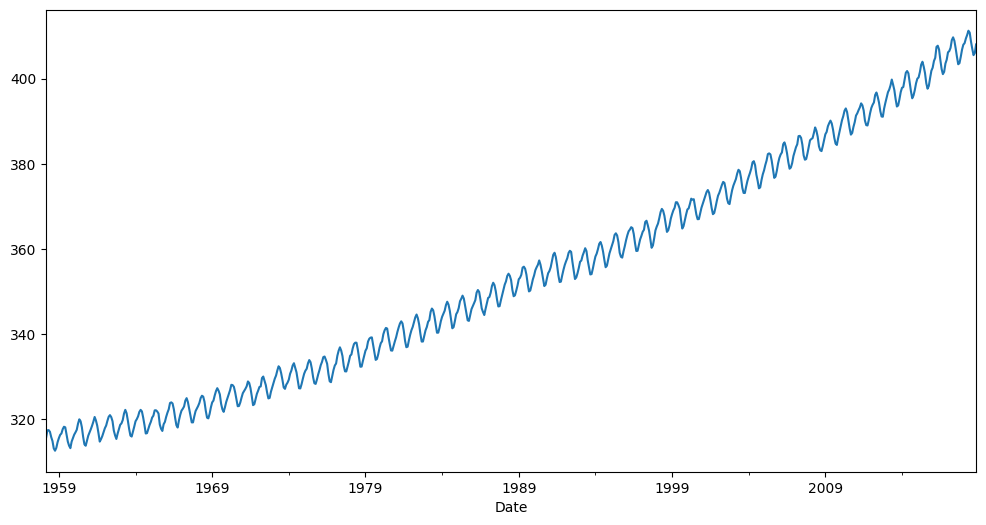

In [14]:
df['interpolated'].plot(figsize=(12,6))

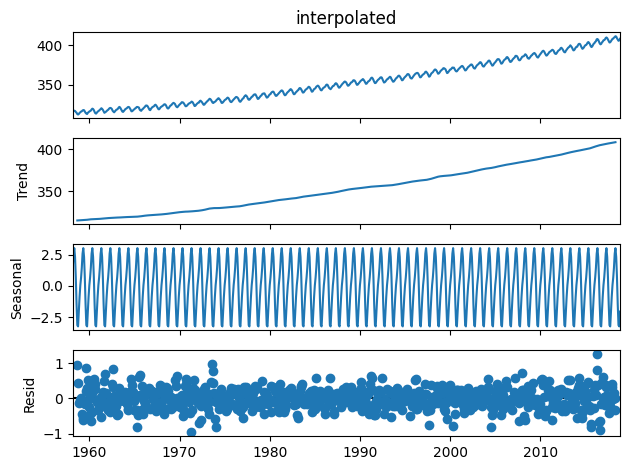

In [15]:
result = seasonal_decompose(df['interpolated'],model='additive')
result.plot();

In [16]:
auto_arima(df['interpolated'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  729
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -206.259
Date:                            Fri, 02 May 2025   AIC                            424.517
Time:                                    18:45:19   BIC                            452.059
Sample:                                03-01-1958   HQIC                           435.145
                                     - 11-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3523      0.031     11.544      0.000       0.292       0.412
ar.L2          0.0869      0.018      4.721      0.000       0.051       0.123
ma.L1         -0.7070      0.033    -21.382      0.000      -0.772      -0.642
ar.S.L12       0.9996      0.000   2773.126      0.000       0.999       1.000
ma.S.L12      -0.8651      0.022    -40.137      0.000      -0.907      -0.823
sigma2         0.0957      0.005     20.367      0.000       0.087       0.105
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 4.44
Prob(Q):                              0.78   Prob(JB):                         0.11
Heteroskedasticity (H):               1.13   Skew:                            -0.00
Prob(H) (two-sided):                  0.35   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [33]:
len(df)

729

In [34]:
train = df.iloc[:717]
test = df.iloc[717:]

In [35]:
model = SARIMAX(train['interpolated'],order=(2,1,1),seasonal_order=(1,0,1,12))

In [36]:
results = model.fit()

In [37]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       interpolated   No. Observations:                  717
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -201.882
Date:                            Fri, 02 May 2025   AIC                            415.763
Time:                                    18:55:50   BIC                            443.206
Sample:                                03-01-1958   HQIC                           426.360
                                     - 11-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3482      0.039      8.845      0.000       0.271       0.425
ar.L2          0.0837      0.020      4.098      0.000       0.044       0.124
ma.L1         -0.7024      0.041    -16.993      0.000      -0.783      -0.621
ar.S.L12       0.9996      0.000   2787.607      0.000       0.999       1.000
ma.S.L12      -0.8655      0.023    -38.081      0.000      -0.910      -0.821
sigma2         0.0953      0.005     20.371      0.000       0.086       0.104
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 4.67
Prob(Q):                              0.80   Prob(JB):                         0.10
Heteroskedasticity (H):               1.14   Skew:                             0.02
Prob(H) (two-sided):                  0.30   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Date'>

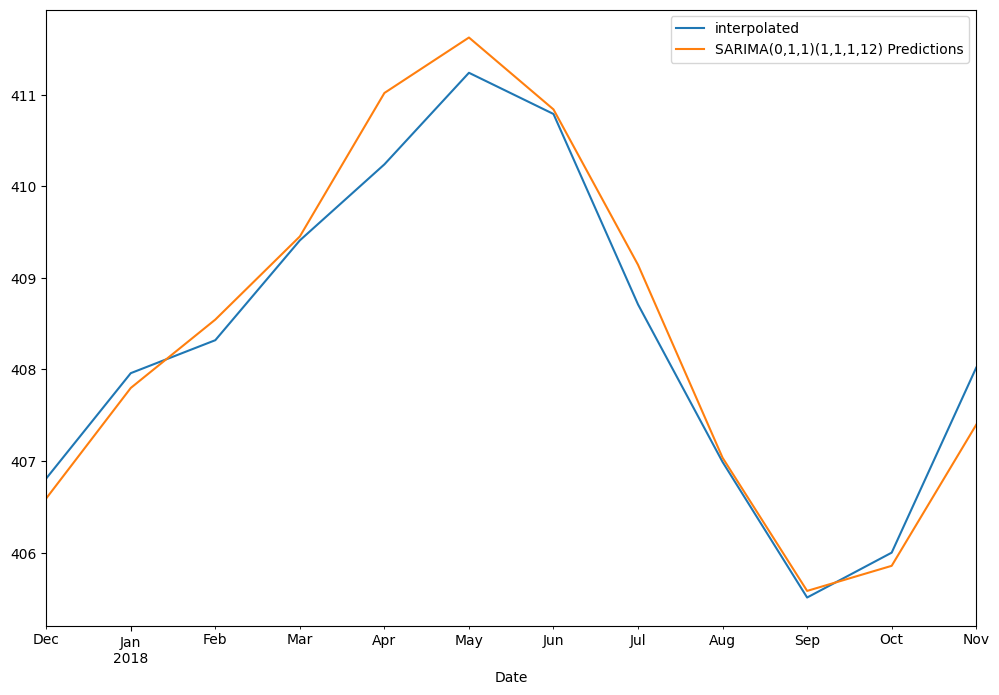

In [31]:
start = len(train)
end = len(train) + len(test) - 1

predictions = results.predict(start=start, end=end,typ='levels').rename('SARIMA(0,1,1)(1,1,1,12) Predictions')

test['interpolated'].plot(figsize=(12,8),legend=True)
predictions.plot(legend=True)

<Axes: xlabel='Date'>

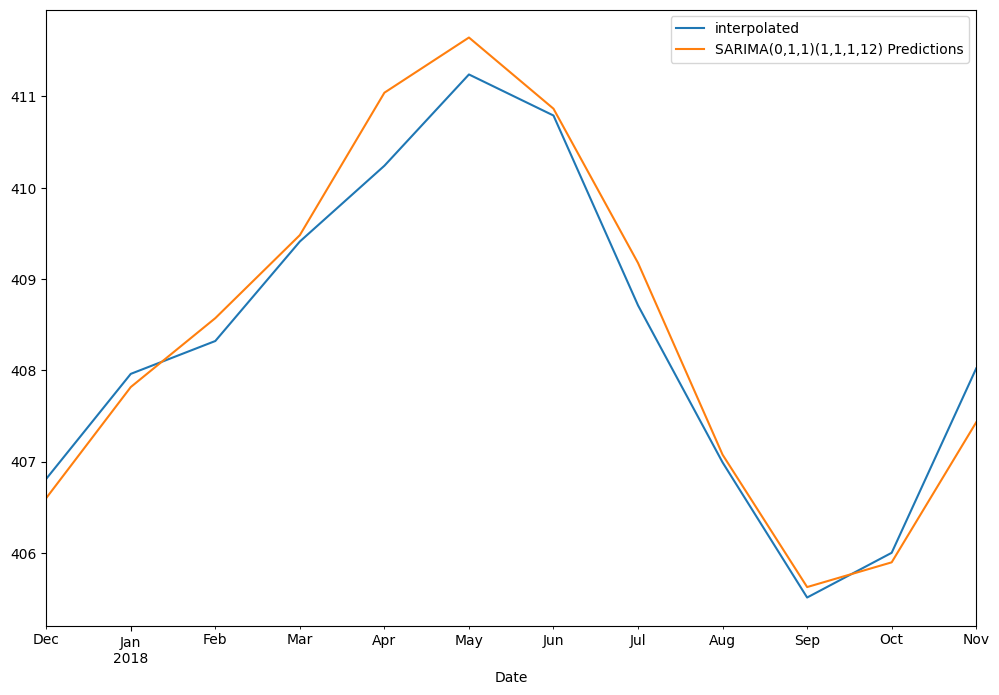

In [38]:
start = len(train)
end = len(train) + len(test) - 1

predictions = results.predict(start=start, end=end,typ='levels').rename('SARIMA(0,1,1)(1,1,1,12) Predictions')

test['interpolated'].plot(figsize=(12,8),legend=True)
predictions.plot(legend=True)

In [39]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test['interpolated'],predictions)
error



0.35798902186823933

In [41]:
test.mean()



year            2017.916667
month              6.500000
decimal_date    2018.416667
average          408.333333
interpolated     408.333333
dtype: float64

# future forecast 

In [42]:
model = SARIMAX(df['interpolated'],order=(2,1,1),seasonal_order=(1,0,1,12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       interpolated   No. Observations:                  729
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -206.259
Date:                            Fri, 02 May 2025   AIC                            424.517
Time:                                    18:58:10   BIC                            452.059
Sample:                                03-01-1958   HQIC                           435.145
                                     - 11-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3523      0.031     11.544      0.000       0.292       0.412
ar.L2          0.0869      0.018      4.721      0.000       0.051       0.123
ma.L1         -0.7070      0.033    -21.382      0.000      -0.772      -0.642
ar.S.L12       0.9996      0.000   2773.126      0.000       0.999       1.000
ma.S.L12      -0.8651      0.022    -40.137      0.000      -0.907      -0.823
sigma2         0.0957      0.005     20.367      0.000       0.087       0.105
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 4.44
Prob(Q):                              0.78   Prob(JB):                         0.11
Heteroskedasticity (H):               1.13   Skew:                            -0.00
Prob(H) (two-sided):                  0.35   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:
fcast = results.predict(start=len(df),end=len(df)+11,typ='levels').rename('SARIMA(2,1,1)(1,0,1,12) Forecast')

<Axes: xlabel='Date'>

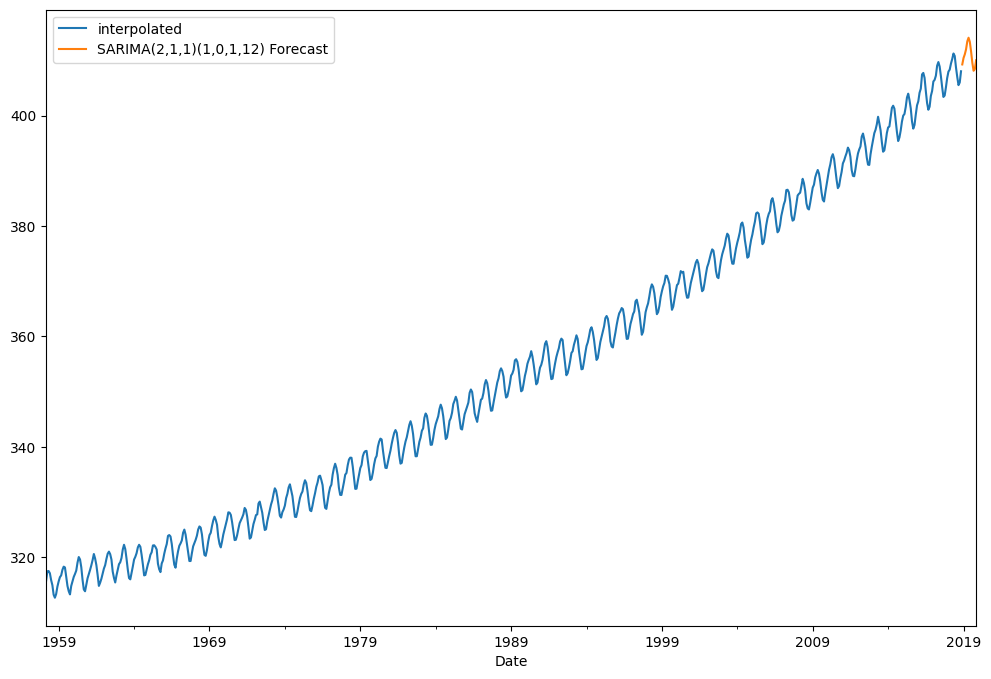

In [48]:
df['interpolated'].plot(figsize=(12,8),legend=True)
fcast.plot(legend=True)


# SarimaX Models

In [49]:
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')


In [50]:
df = pd.read_csv('CSVs/RestaurantVisitors.csv',index_col='date',parse_dates=True )

In [51]:
df.index.freq = "D"

In [52]:
df.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [53]:
df1 = df.dropna()

In [55]:
df1.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-18,Tuesday,0,na,30.0,30.0,13.0,18.0,91.0
2017-04-19,Wednesday,0,na,20.0,11.0,30.0,18.0,79.0
2017-04-20,Thursday,0,na,22.0,3.0,19.0,46.0,90.0
2017-04-21,Friday,0,na,38.0,53.0,36.0,38.0,165.0
2017-04-22,Saturday,0,na,97.0,20.0,50.0,59.0,226.0


In [56]:
df1.columns

Index(['weekday', 'holiday', 'holiday_name', 'rest1', 'rest2', 'rest3',
       'rest4', 'total'],
      dtype='object')

In [60]:
cols = ['rest1', 'rest2', 'rest3','rest4', 'total']

In [61]:
for column in cols:
    df1[column] = df1[column].astype(int)

In [62]:
df1.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65,25,67,139,296
2016-01-02,Saturday,0,na,24,39,43,85,191
2016-01-03,Sunday,0,na,24,31,66,81,202
2016-01-04,Monday,0,na,23,18,32,32,105
2016-01-05,Tuesday,0,na,2,15,38,43,98


<Axes: xlabel='date'>

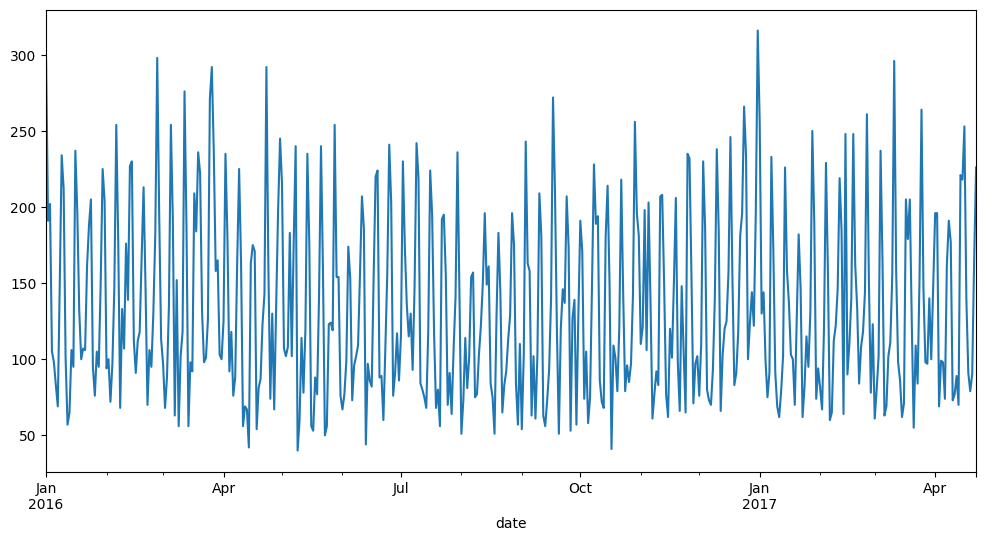

In [63]:
df1['total'].plot(figsize=(12,6))

In [64]:
df1.query('holiday==1').index

DatetimeIndex(['2016-01-01', '2016-01-18', '2016-02-02', '2016-02-14',
               '2016-02-15', '2016-03-17', '2016-03-25', '2016-03-27',
               '2016-03-28', '2016-05-05', '2016-05-08', '2016-05-30',
               '2016-06-19', '2016-07-04', '2016-09-05', '2016-10-10',
               '2016-10-31', '2016-11-11', '2016-11-24', '2016-11-25',
               '2016-12-24', '2016-12-25', '2016-12-31', '2017-01-01',
               '2017-01-16', '2017-02-02', '2017-02-14', '2017-02-20',
               '2017-03-17', '2017-04-14', '2017-04-16', '2017-04-17'],
              dtype='datetime64[ns]', name='date', freq=None)

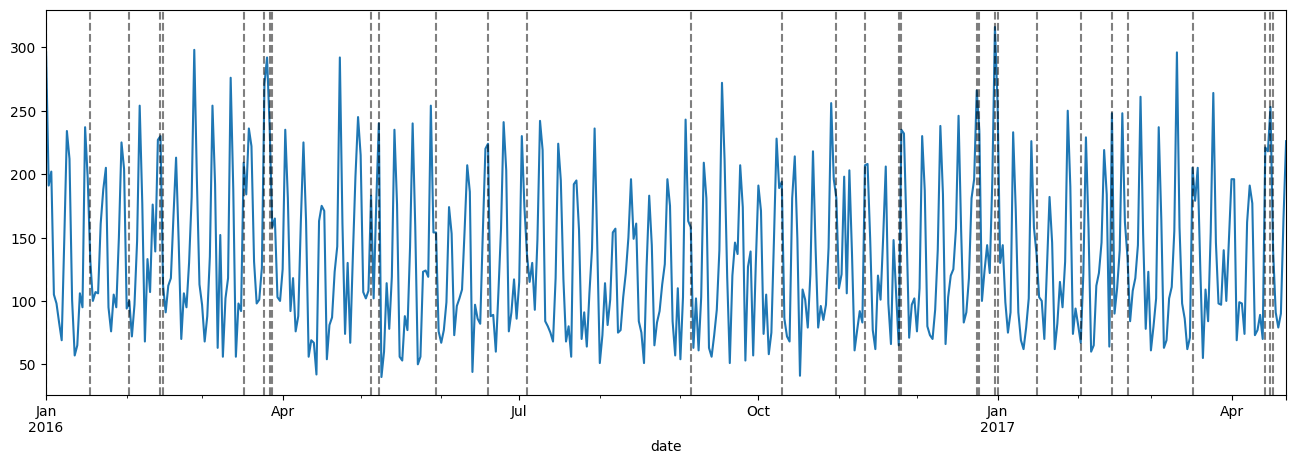

In [66]:
ax = df1['total'].plot(figsize = (16,5))
for day in df1.query('holiday ==1 ').index:
    ax.axvline(x=day,linestyle='--',c='k',alpha=0.5) # it shows the vertical line at the holiday




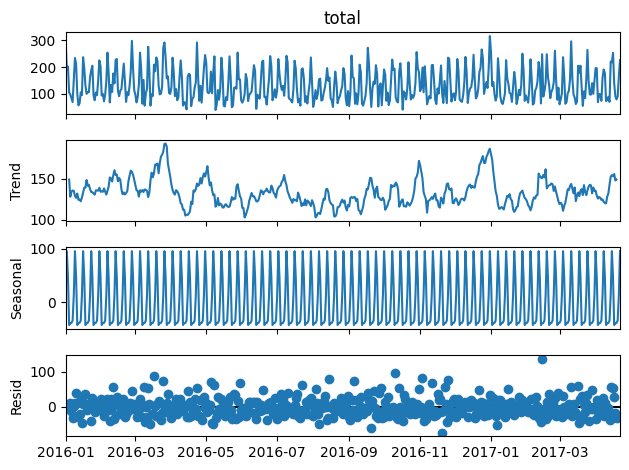

In [67]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df1['total'],model='additive')
result.plot();
 

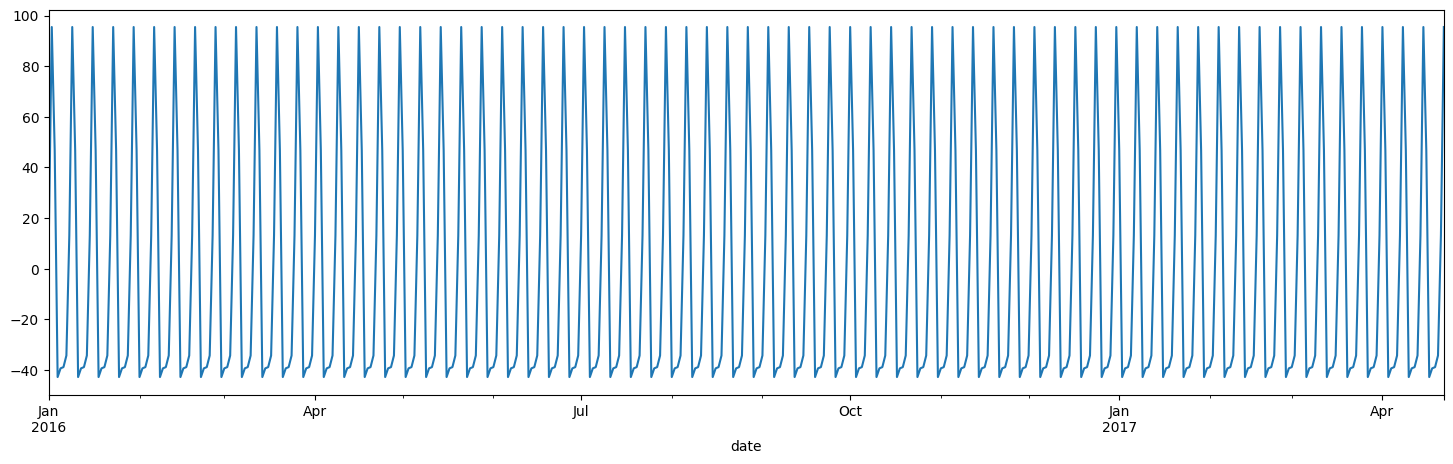

In [68]:
result.seasonal.plot(figsize=(18,5));

In [69]:
len(df1)

478

In [70]:
train = df1.iloc[:436]
test = df1.iloc[436:]

In [71]:
from pmdarima import auto_arima

In [72]:
auto_arima(df1['total'],seasonal=True,m=7).summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  478
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 7)   Log Likelihood               -2385.012
Date:                             Mon, 05 May 2025   AIC                           4780.025
Time:                                     11:25:53   BIC                           4800.873
Sample:                                 01-01-2016   HQIC                          4788.221
                                      - 04-22-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.9849      1.966      3.045      0.002       2.132       9.838
ar.L1          0.1380      0.047      2.921      0.003       0.045       0.231
ar.S.L7        0.9430      0.018     53.523      0.000       0.909       0.978
ma.S.L7       -0.7030      0.058    -12.210      0.000      -0.816      -0.590
sigma2      1315.0726     85.548     15.372      0.000    1147.401    1482.744
===================================================================================
Ljung-Box (L1) (Q):                   0.99   Jarque-Bera (JB):                69.36
Prob(Q):                              0.32   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.76
Prob(H) (two-sided):                  0.33   Kurtosis:                         4.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [73]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [75]:
model = SARIMAX(train['total'],order=(1,0,0),seasonal_order=(1,0,1,7), enforce_invertibility=False) # enforce_invertibility is used to remove the warning

In [76]:
results = model.fit()

In [77]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               total   No. Observations:                  436
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 7)   Log Likelihood               -2155.511
Date:                             Mon, 05 May 2025   AIC                           4319.023
Time:                                     12:18:41   BIC                           4335.333
Sample:                                 01-01-2016   HQIC                          4325.460
                                      - 03-11-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2192      0.043      5.065      0.000       0.134       0.304
ar.S.L7        0.9999      0.000   8043.003      0.000       1.000       1.000
ma.S.L7       -0.9405      0.023    -40.041      0.000      -0.986      -0.894
sigma2      1068.5523     54.314     19.674      0.000     962.099    1175.005
===================================================================================
Ljung-Box (L1) (Q):                   1.02   Jarque-Bera (JB):               106.77
Prob(Q):                              0.31   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                             0.77
Prob(H) (two-sided):                  0.61   Kurtosis:                         4.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [78]:
start = len(train)
end = len(train) + len(test) - 1



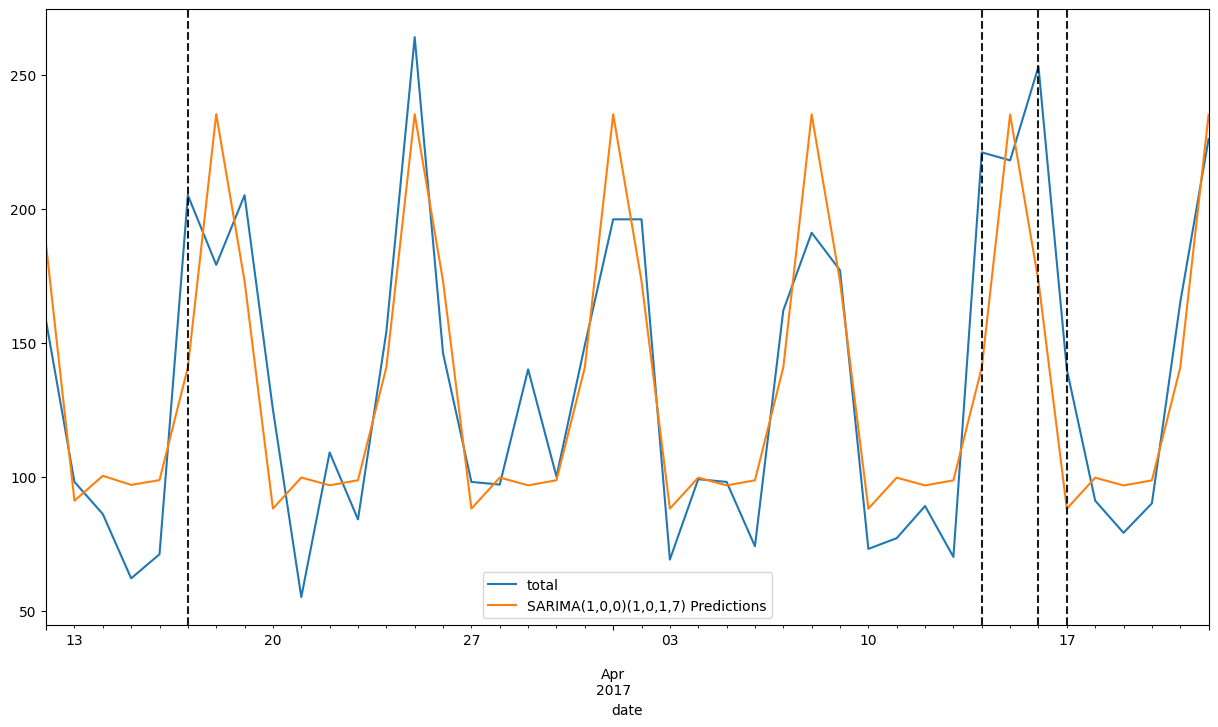

In [80]:
predictions = results.predict(start=start, end=end,typ='levels').rename('SARIMA(1,0,0)(1,0,1,7) Predictions')

ax =test['total'].plot(figsize=(15,8),legend=True)
predictions.plot(legend=True)

for day in test.query('holiday ==1 ').index:
    ax.axvline(x=day,linestyle='--',c='k',alpha=0.9);

In [81]:
from statsmodels.tools.eval_measures import rmse

In [82]:
rmse(test['total'],predictions)


31.96986254826255

In [83]:
test['total'].mean()

134.26190476190476

In [84]:
auto_arima(df1['total'],exogenous=df1[['holiday']],seasonal=True,m=7).summary( )

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  478
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 7)   Log Likelihood               -2385.012
Date:                             Mon, 05 May 2025   AIC                           4780.025
Time:                                     12:53:36   BIC                           4800.873
Sample:                                 01-01-2016   HQIC                          4788.221
                                      - 04-22-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.9849      1.966      3.045      0.002       2.132       9.838
ar.L1          0.1380      0.047      2.921      0.003       0.045       0.231
ar.S.L7        0.9430      0.018     53.523      0.000       0.909       0.978
ma.S.L7       -0.7030      0.058    -12.210      0.000      -0.816      -0.590
sigma2      1315.0726     85.548     15.372      0.000    1147.401    1482.744
===================================================================================
Ljung-Box (L1) (Q):                   0.99   Jarque-Bera (JB):                69.36
Prob(Q):                              0.32   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.76
Prob(H) (two-sided):                  0.33   Kurtosis:                         4.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# train SARIMAX model

In [85]:
model = SARIMAX(train['total'],exog=train['holiday'],order=(1,0,0),seasonal_order=(1,0,1,7),enforce_invertibility=False)

In [87]:
result = model.fit()

In [88]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               total   No. Observations:                  436
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 7)   Log Likelihood               -2089.208
Date:                             Mon, 05 May 2025   AIC                           4188.417
Time:                                     12:56:19   BIC                           4208.805
Sample:                                 01-01-2016   HQIC                          4196.463
                                      - 03-11-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       68.9352      3.773     18.271      0.000      61.541      76.330
ar.L1          0.2101      0.044      4.763      0.000       0.124       0.297
ar.S.L7        1.0000   5.78e-05   1.73e+04      0.000       1.000       1.000
ma.S.L7       -0.9581      0.022    -43.532      0.000      -1.001      -0.915
sigma2       779.3166     44.867     17.370      0.000     691.379     867.254
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                20.47
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                             0.22
Prob(H) (two-sided):                  0.88   Kurtosis:                         3.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [89]:
start = len(train)
end = len(train) + len(test) - 1

<Axes: xlabel='date'>

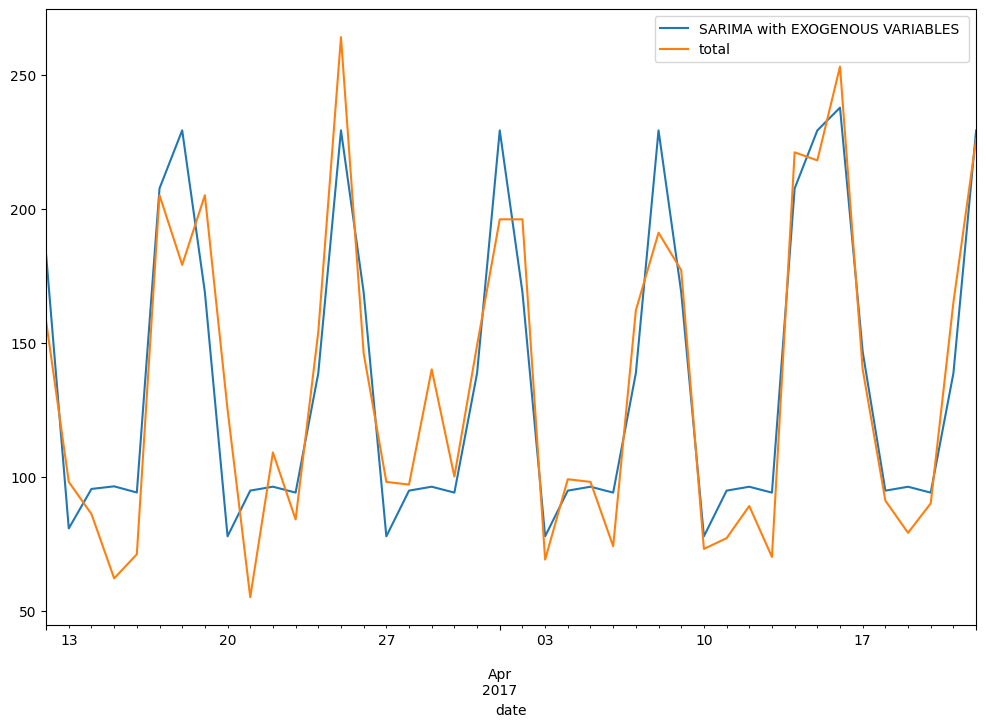

In [90]:
predictions = result.predict(start=start, end=end,exog=test['holiday'],typ='levels').rename('SARIMA with EXOGENOUS VARIABLES ')

predictions.plot(figsize=(12,8),legend=True)
test['total'].plot(legend=True)

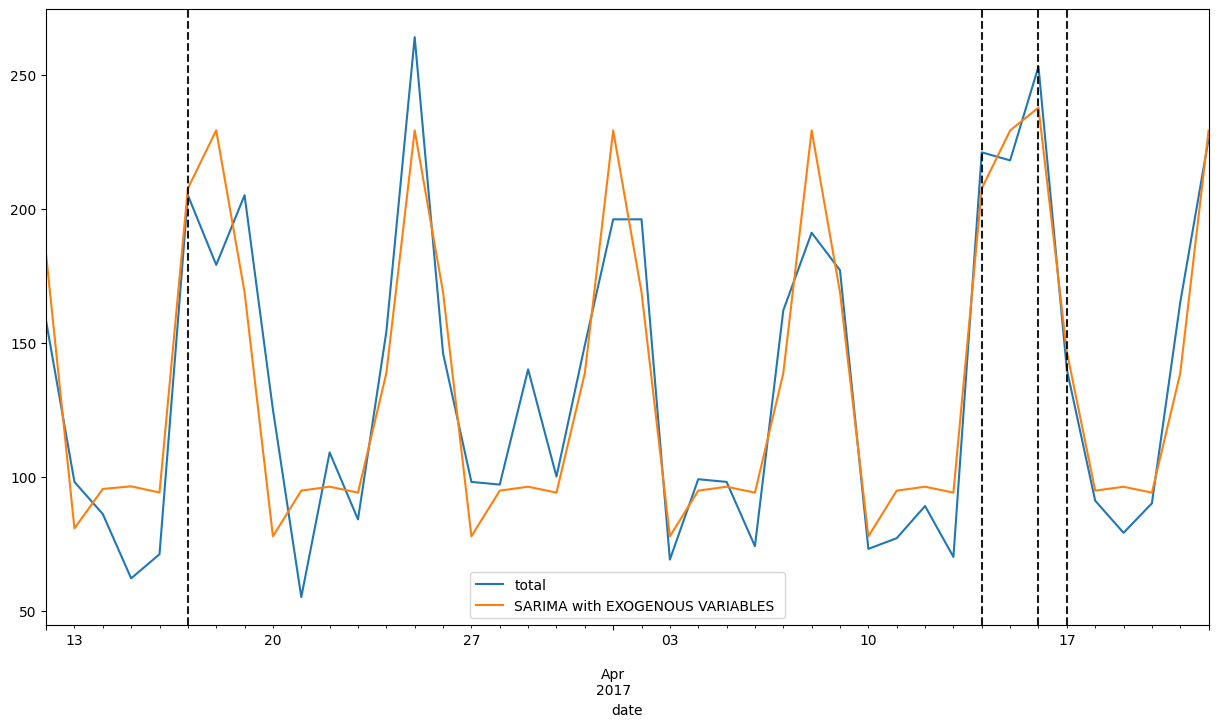

In [91]:
    
ax =test['total'].plot(figsize=(15,8),legend=True)
predictions.plot(legend=True)

for day in test.query('holiday ==1 ').index:
    ax.axvline(x=day,linestyle='--',c='k',alpha=0.9);

In [92]:
rmse(test['total'],predictions) 

22.929755026590993

In [93]:
model = SARIMAX(df1['total'],exog=df1['holiday'],order=(1,0,0),seasonal_order=(1,0,1,7),enforce_invertibility=False)

In [94]:
results = model.fit()

In [95]:
df.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN
2017-05-30,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-31,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN


In [99]:
exog_forecast = df[478:][['holiday']]

In [100]:
fcast = results.predict(len(df1),len(df1)+ 38,exog = exog_forecast).rename('Final SARIMA Forecast with EXOGENOUS VARIABLES')

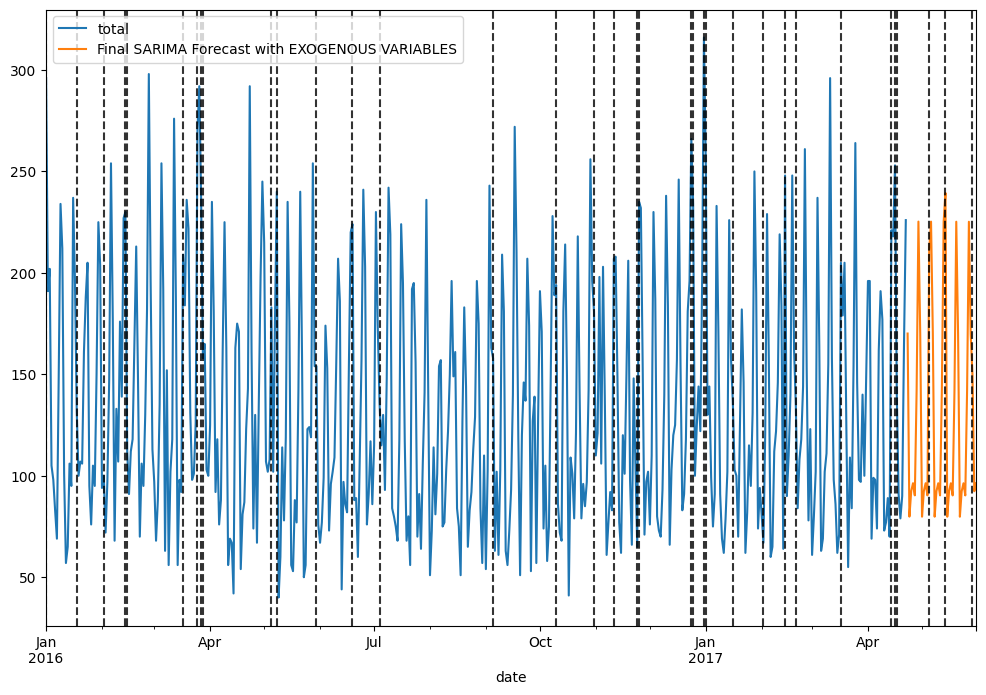

In [104]:
ax = df1['total'].plot(figsize=(12,8),legend=True)
fcast.plot(legend=True)


for x in df.query('holiday ==1 ').index:
    ax.axvline(x=x,linestyle='--',c='k',alpha=0.8);

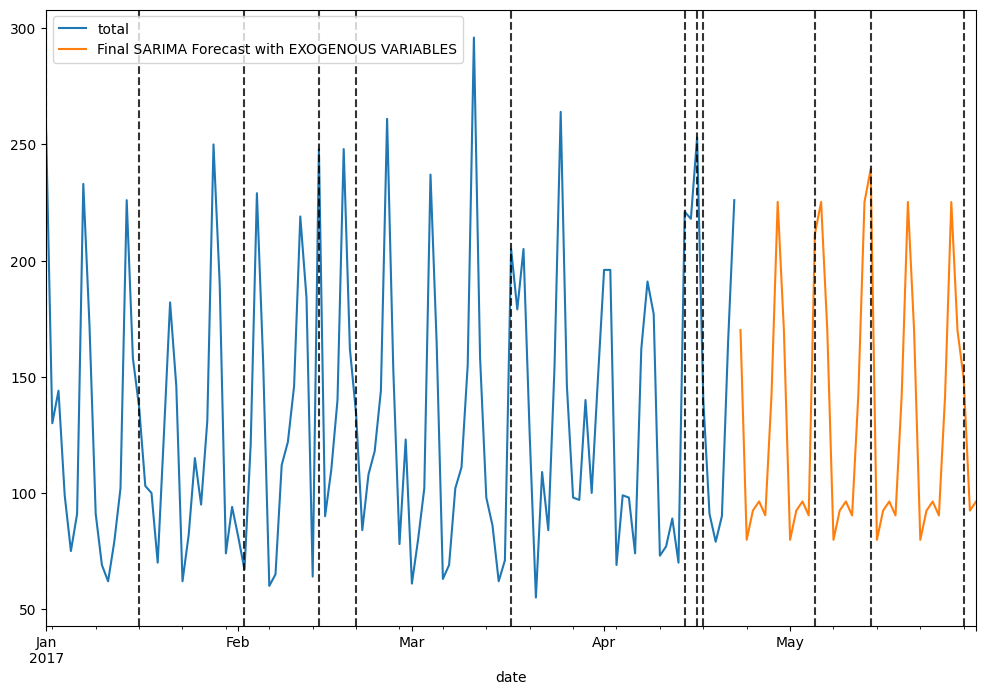

In [106]:
ax = df1['total'].loc['2017-01-01':].plot(figsize=(12,8),legend=True)
fcast.plot(legend=True)


for x in df.query('holiday ==1 ').index:
    ax.axvline(x=x,linestyle='--',c='k',alpha=0.8);